In [32]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.colors

import torch
from collections import OrderedDict, defaultdict
from functools import partial

In [27]:
from scipy.stats import entropy

In [3]:
d = torch.load("./resnet50_cifar_iologit.pth")

In [4]:
d.keys()

dict_keys(['input', 'logit', 'target'])

In [90]:
# d['target']
# logit=d['logit'][0]
# plt.bar(list(range(len(logit))), logit)

In [ ]:
def softmax(x, T=1):
    return np.exp(x/T)/sum(np.exp(x/T))

In [34]:
h_base2 = partial(entropy, base=2)

In [84]:
all_T = list(np.arange(0,10)+1)
softmax_fixed_logit = partial(softmax, x=logit)

Text(0.5, 0.98, 'Regulated softmax on logits of Resnet50/Cifar100')

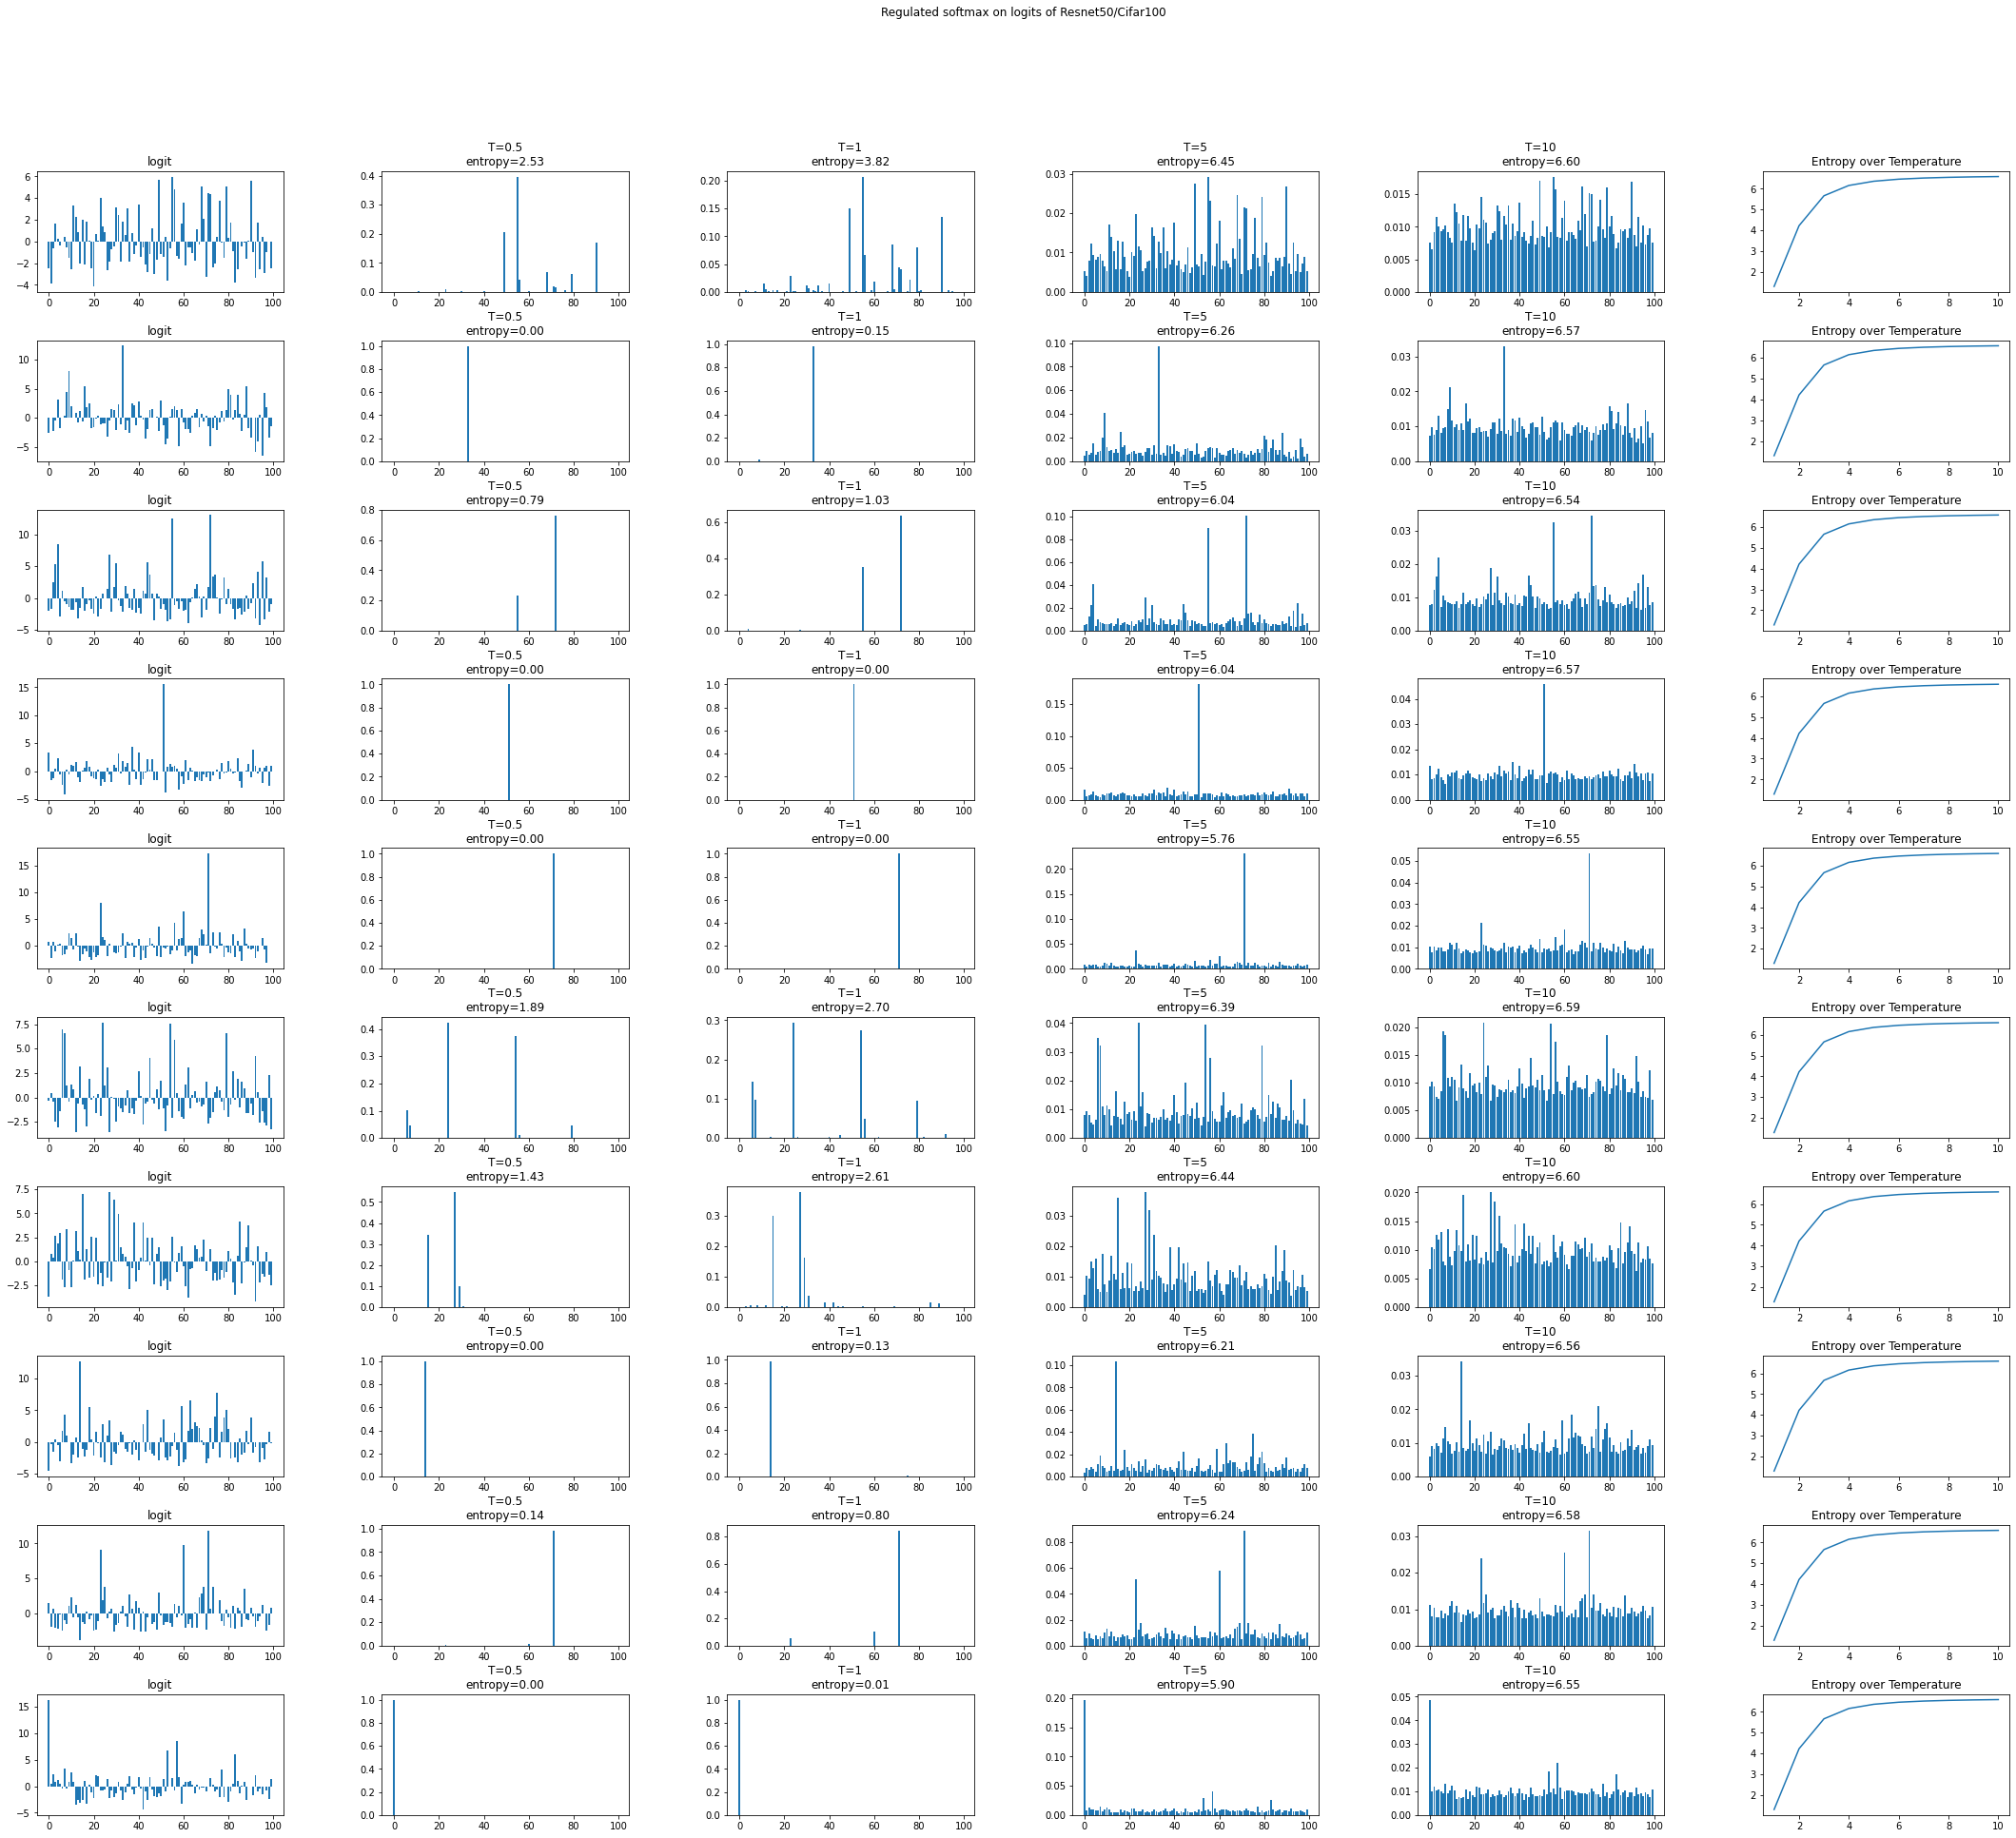

In [97]:
nrow = 10
ncol = 6

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*6, nrow*3))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

dist_range = [0.0, 0.2]

tlist = [0.5, 1,5,10]
for idx, (input, logit, target) in enumerate(zip(*d.values())):
    if idx+1 > nrow:
        break
    axes[idx, 0].bar(list(range(len(logit))), logit)
    axes[idx, 0].set_title("logit")
    
    for col, temperature in enumerate(tlist):
        dist = softmax(logit, T=temperature)
        h = h_base2(dist)
        axes[idx, col+1].bar(list(range(len(logit))), dist)
        # axes[idx, col+1].set_ylim(dist_range)
        axes[idx, col+1].set_title("T={}\nentropy={:.2f}".format(temperature, h))
        
    all_h = list(map(lambda t: h_base2(softmax_fixed_logit(T=t)), all_T))
    axes[idx, len(tlist)+1].plot(all_T, all_h)
    axes[idx, len(tlist)+1].set_title("Entropy over Temperature")
    
fig.suptitle("Regulated softmax on logits of Resnet50/Cifar100")

entropy saturates while raising temperature.